# Mini-Challenge 1

Modul: Deep Learning  
Thema: Hyperparameter und Model Tuning  
Student: Si Ben Tran  
Fachexperte: Martin Melchior  
Abgabetermin: Ende FS23   

Ziel:  
Implementiere, trainiere und validiere ein Neuronales Netzwerk Modell für einen
Klassifikationstask mit geeignetem Dataset. Der zu modellierende Task und die dazu
passenden Daten sollen am Anfang der Mini-Challenge individuell vereinbart werden. Dabei
können die Studierenden auch ihre Wünsche einbringen und Task/Datensatz vorschlagen.
Dabei ist aber darauf zu achten, dass der Fokus auf das Training und die Evaluation gelegt
und nicht zu viel Zeit mit Datenbeschaffung, -Analyse und -Vorverarbeitung verbraucht wird.
Der Datensatz sollte auch nicht zu gross sein, um viele verschiedene Modell- und
Parametervarianten evaluieren zu können. Ausserdem sollten nicht zu ausgeklügelte
komplexe Modell-Architekturen untersucht werden. Ein MLP für die Klassifikation allenfalls
mit ein paar CNN-Layern für Feature-Extraktion sollte ausreichen.

Zeitlicher Rahmen:  
Wird beim Schritt 1 verbindlich festgelegt.

Beurteilung:  
Beurteilt wird auf Basis des abgegebenen Notebooks:  
• Vollständige und korrekte Umsetzung der vereinbarten Aufgabestellung.  
• Klare, gut-strukturierte Umsetzung.  
• Schlüssige Beschreibung und Interpretation der Ergebnisse. Gut gewählte und gut kommentierten Plots und Tabellen.  
• Vernünftiger Umgang mit (Computing-)Ressourcen.  
• Verständliche Präsentation der Ergebnisse.  


---

# Arbeitsschritte

## Schritt 1: Auswahl Task / Datensatz  

**Absprache/Beschluss** mit Fachcoach über Daten/Task.

**1. Mache Dir Gedanken, mit welchen Daten Du arbeiten möchtest und welcher Task
gelernt werden soll.**  

Gedanken: Ich moechte gerne ein CNN-Modell zur Klassifizierung des CIFAR-10-Datensatzes zu trainieren, um ein besseres Verständnis von CNNs zu erlangen und die Hyperparameter mithilfe von Weights & Biases-Integration zu optimieren.

**2. Diskutiere die Idee mit dem Fachcoach.**  

Diskussion: Es wurde mal vorerst vereinbart, am 16.04.23 die Minichallenge 1 abzugeben und die Aufgaben zu erledigen. 


---

## Schritt 2: Daten Kennenlernen
Wie erwähnt, sollte dieser Schritt nicht viel Zeit beanspruchen, da der Datensatz einfach
sein soll!


**1. Mache Dich mit dem Datensatz vertraut, indem Du eine (kurze) explorative Analyse
der Features durchführst: z.B. Vergleich der Klassen pro Feature, Balanciertheit der
Klassen.**


In [1]:
# Libraries Laden

## PyTorch Libraries
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn 
# import torch.nn.functional as F for activation functions
import torch.nn.functional as F

# import pytorch optimizer SGD 
import torch.optim as optim

## Data Science Libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## import wandb for logging and tracking
import wandb

# Device Einstellungen
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('torch cuda is available:', torch.cuda.is_available())
print('Using device:', device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
else:
    print('No GPU available, using the CPU instead.')

# wandb login 
print("Successfull wandb login: ", wandb.login())

torch cuda is available: False
Using device: cpu
No GPU available, using the CPU instead.


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: 7ben18. Use `wandb login --relogin` to force relogin


Successfull wandb login:  True


In [2]:
# Laden der CIFAR-10 Daten
cifar_trainset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=None)
cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Dimension vom Datensatz
print("Trainingsset: Anzahl Bilder {}, Hoehe {}, Breite {}, Farbkanäle {}".format(cifar_trainset.data.shape[0], cifar_trainset.data.shape[1], cifar_trainset.data.shape[2], cifar_trainset.data.shape[3]))
print("Testset: Anzahl Bilder {} , Hoehe {}, Breite {}, Farbkanäle {}".format(cifar_testset.data.shape[0], cifar_testset.data.shape[1], cifar_testset.data.shape[2], cifar_testset.data.shape[3]))

Trainingsset: Anzahl Bilder 50000, Hoehe 32, Breite 32, Farbkanäle 3
Testset: Anzahl Bilder 10000 , Hoehe 32, Breite 32, Farbkanäle 3


In [4]:
# Labels und Targets 
print("Alle vorhandenen Labels Trainset: ", cifar_trainset.classes)
print("Alle vorhandenen Targets Trainset: ", cifar_trainset.targets)

# testdatensatz
print("Alle vorhandenen Labels Trainset: ", cifar_testset.classes)
print("Alle vorhandenen Targets Testset: ", cifar_testset.targets)

Alle vorhandenen Labels Trainset:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Alle vorhandenen Targets Trainset:  [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 

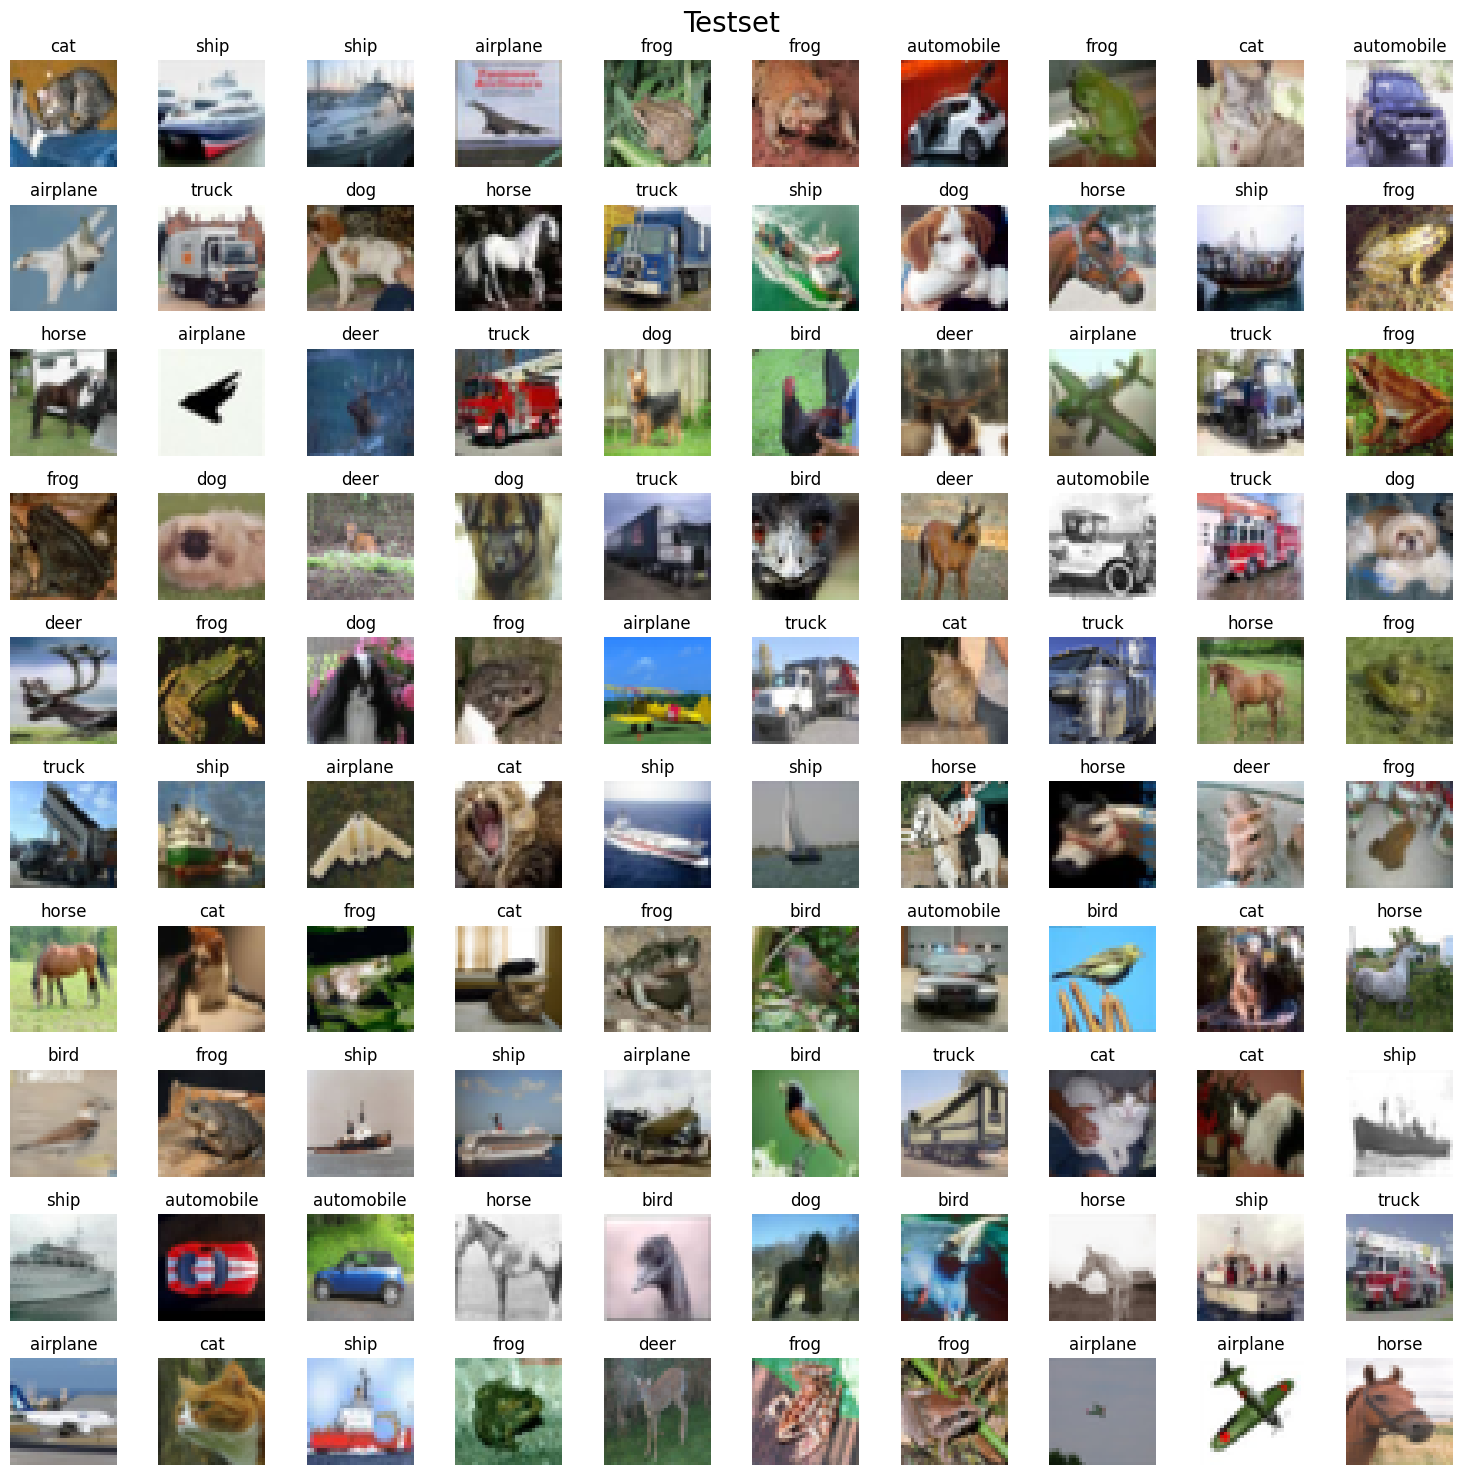

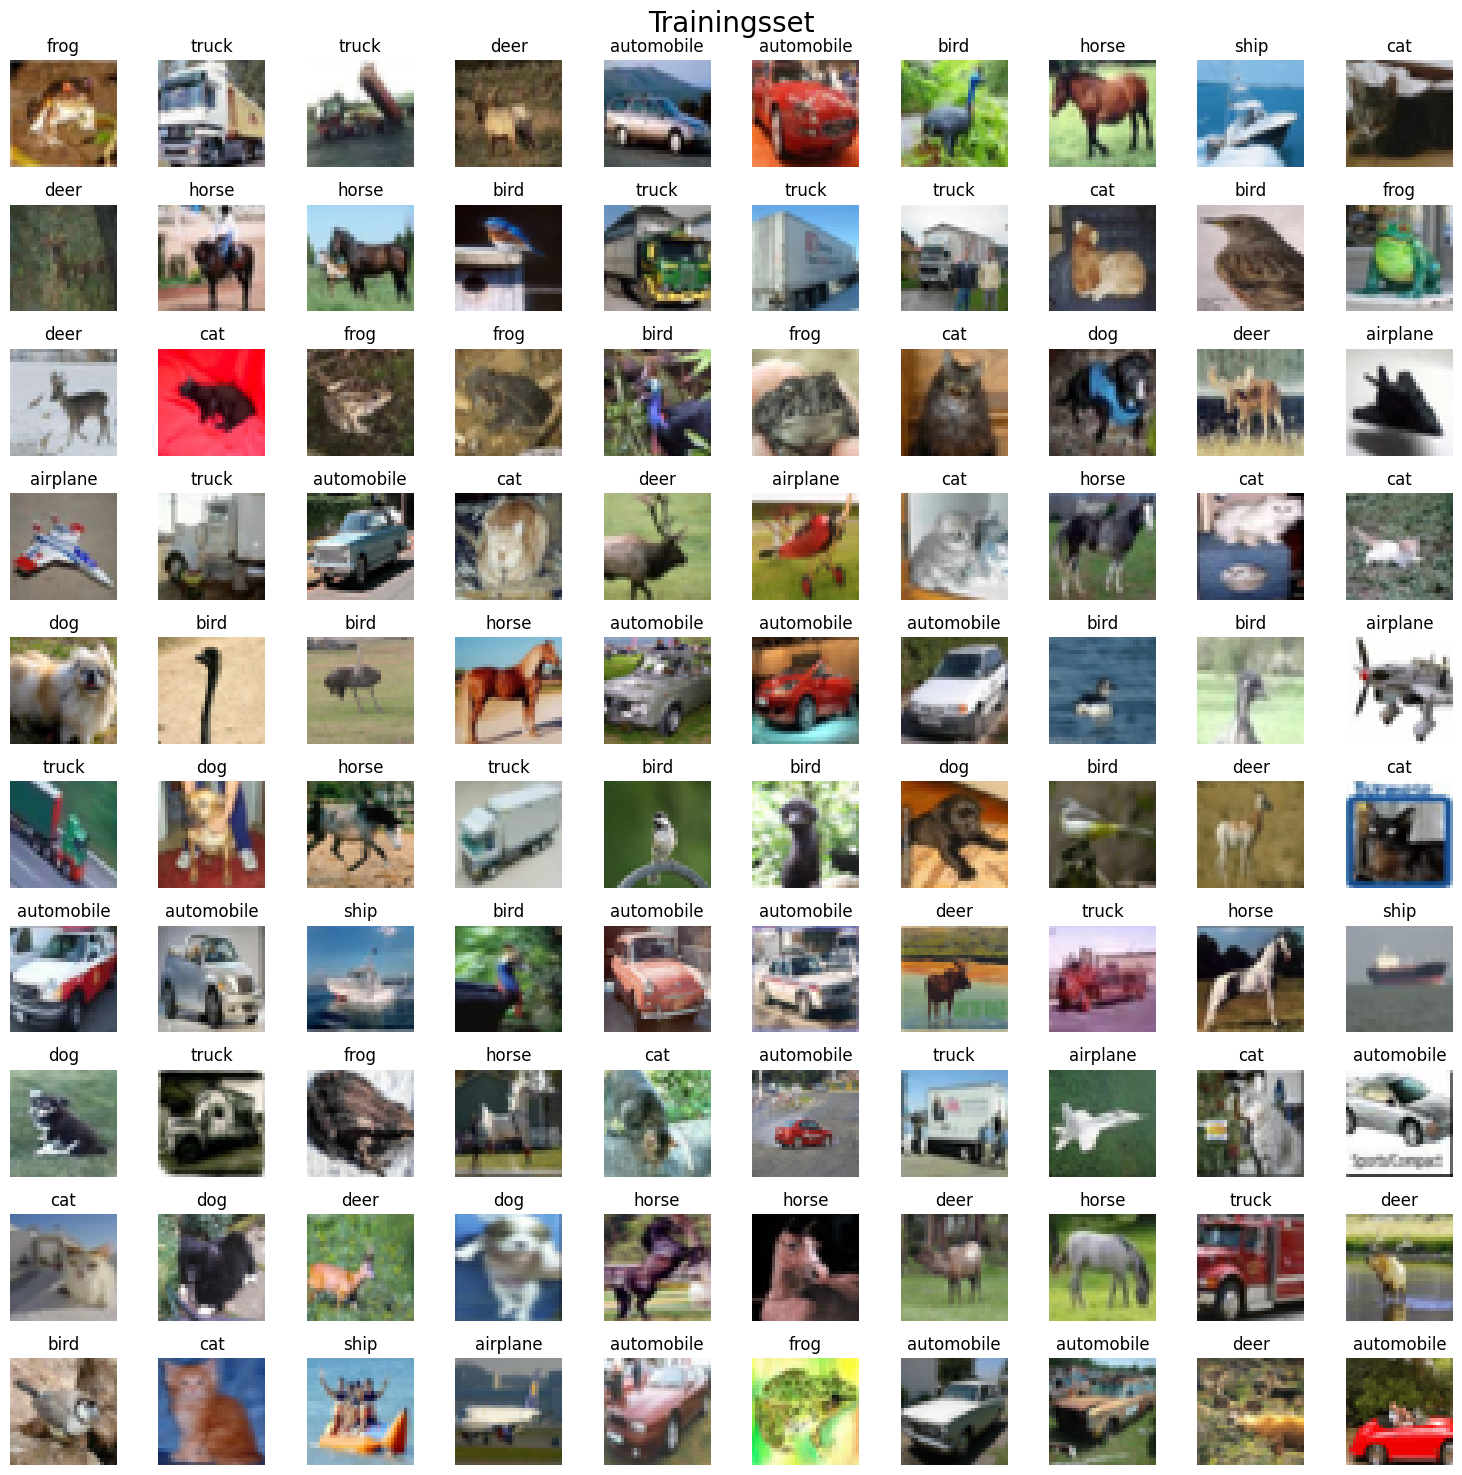

In [5]:
# create a function for plotting 10x10 grid
def plot_10x10_grid(data, title):
    '''
    plotting 10x10 grid of images
    '''
    fig, ax = plt.subplots(10, 10, figsize=(15, 15))
    for i in range(10):
        for j in range(10):
            # plot image 
            ax[i, j].imshow(data.data[i*10+j])
            # add title to each subplot
            ax[i, j].set_title(data.classes[data.targets[i*10+j]])
            # set axis labeling off
            ax[i, j].axis('off')
            # set grid off
            ax[i, j].grid(False)
    # add title and adjust layout
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

# plot testset 10x10 grid
plot_10x10_grid(cifar_testset, 'Testset')
plot_10x10_grid(cifar_trainset, 'Trainingsset')

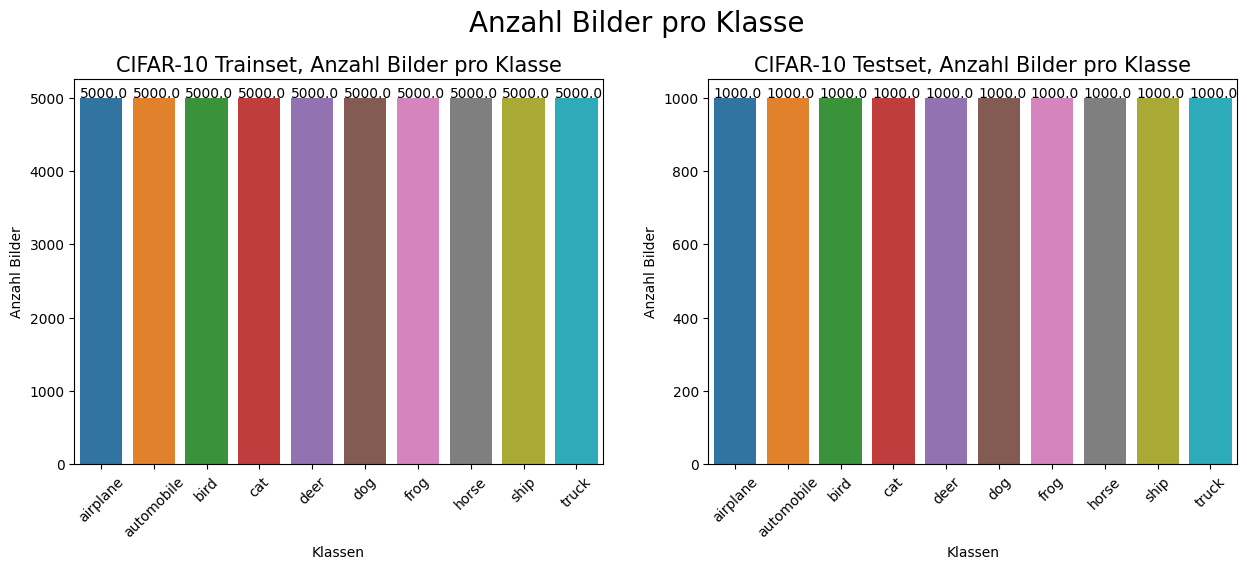

In [6]:
# Visualisierung Anzahl Bilder Pro Klasse  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# plot barplot
sns.barplot(x=cifar_trainset.classes, y=np.bincount(cifar_trainset.targets), ax=ax1)
sns.barplot(x=cifar_testset.classes, y=np.bincount(cifar_testset.targets), ax=ax2)
# set title and labels
ax1.set_title("CIFAR-10 Trainset, Anzahl Bilder pro Klasse", fontsize=15)
ax2.set_title("CIFAR-10 Testset, Anzahl Bilder pro Klasse", fontsize=15)
ax1.set_ylabel("Anzahl Bilder", fontsize=10)
ax1.set_xlabel("Klassen", fontsize=10)
ax2.set_ylabel("Anzahl Bilder", fontsize=10)
ax2.set_xlabel("Klassen", fontsize=10)
# rotate xticklabels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
# add suptitle
fig.suptitle("Anzahl Bilder pro Klasse", fontsize=20, y = 1.02)
# add number of images to barplot
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()


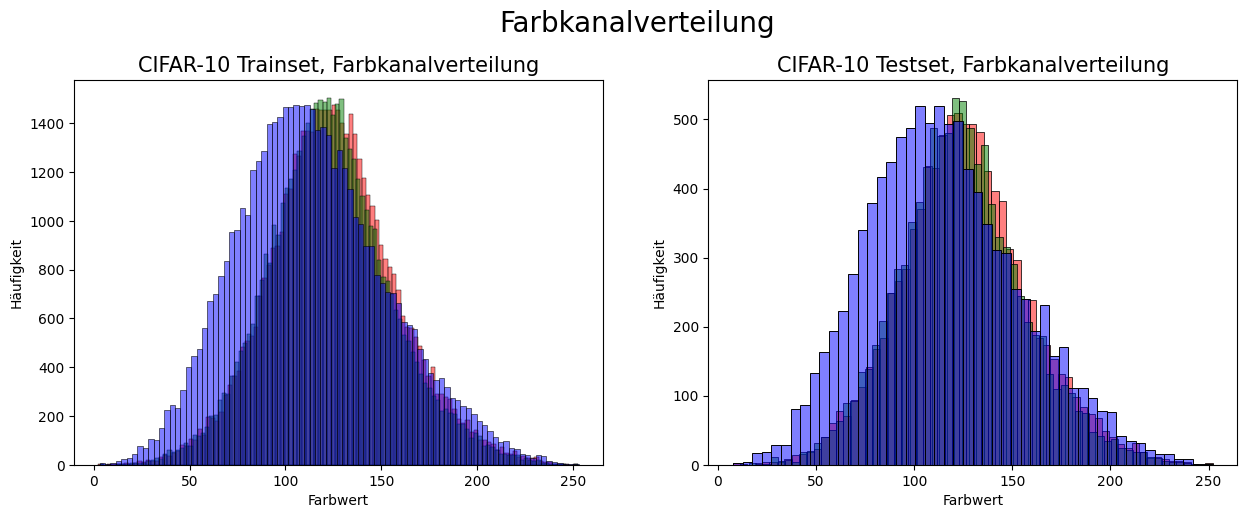

In [7]:
# get the distribution of the colour channels
def get_channel_distribution(data):
    '''
    get the distribution of the colour channels
    '''
    # create empty list for each channel
    r = []
    g = []
    b = []
    # calculate the mean for each 
    for i in range(data.shape[0]):
        r.append(np.mean(data[i, :, :, 0]))
        g.append(np.mean(data[i, :, :, 1]))
        b.append(np.mean(data[i, :, :, 2]))
    return r, g, b

# get the distribution of the colour channels
r_train, g_train, b_train = get_channel_distribution(cifar_trainset.data)
r_test, g_test, b_test = get_channel_distribution(cifar_testset.data)

# plot the distribution of the colour channels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(r_train, ax=ax1, color='r', alpha = 0.5)
sns.histplot(g_train, ax=ax1, color='g', alpha = 0.5)
sns.histplot(b_train, ax=ax1, color='b', alpha = 0.5)
sns.histplot(r_test, ax=ax2, color='r', alpha = 0.5)
sns.histplot(g_test, ax=ax2, color='g', alpha = 0.5)
sns.histplot(b_test, ax=ax2, color='b', alpha = 0.5)
ax1.set_title("CIFAR-10 Trainset, Farbkanalverteilung", fontsize=15)
ax2.set_title("CIFAR-10 Testset, Farbkanalverteilung", fontsize=15)
ax1.set_ylabel("Häufigkeit", fontsize=10)
ax1.set_xlabel("Farbwert", fontsize=10)
ax2.set_ylabel("Häufigkeit", fontsize=10)
ax2.set_xlabel("Farbwert", fontsize=10)
fig.suptitle("Farbkanalverteilung", fontsize=20, y = 1.02)
plt.show()


**2. Führe ein geeignetes Preprocessing durch, z.B. Normalisierung der Daten.**

In [8]:
# CODE

# transforms.Compose mehrere Transformationen auf einmal anwenden
# transforms.ToTensor() wandelt die Bilder in Tensoren um
# transoform.Normalize() normalisiert die Farbkanale (R, G, B) der Bilder . Jeder Kanal hat einen Mittelwert von 0.5 und eine Standardabweichung von 0.5

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# batch_size definiert die Anzahl Bilder die gleichzeitig verarbeitet werden sollen

batch_size = 4

# laden von CIFAR-10 Datensatz und die vorhin definierten Transformationenen anwenden, speichern in ./data
cifar_trainset.transform = transform

# trainloader teilt den Datensatz in batch_size auf und mischt die Daten, num_workers ist die Anzahl an Prozessen

cifar_trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# analog fuer den Testdatensatz

cifar_testset.transform = transform

cifer_testloader = torch.utils.data.DataLoader(cifar_testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Klassen definieren
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

---

## Schritt 3: Aufbau Modellierung

**Absprache/Beschluss** mit Fachcoach über die zu untersuchenden Varianten (Schritte 4)

**1. Lege fest, wie (mit welchen Metriken) Du Modelle evaluieren möchtest.
Berücksichtige auch den Fehler in der Schätzung dieser Metriken.**

Als Evaluierungsmetrik verwende ich die Accuracy, da es sich um ein Klassifikationsproblem handelt und die Verteilungen der Klassen ueber den ganzen Datensatz hinweg gleichmaessig verteilt sind, sowohl im Trainingsdatensatz als auch im Testdatensatz.

Die accuracy berechnet sich wie folgt:

$$
\text{accuracy} = \frac{\text{Anzahl korrekt klassifiziert}}{\text{Anzahl aller Beispiele}}
$$

Als Loss Funktion nutzen wir die Cross-Entropy Loss, da es sich um ein multiple Klassifikationsproblem handelt. Die Cross-Entropy Loss berechnet sich wie folgt:

$$
\text{Cross-Entropy Loss} = -\sum_{i=1}^{n} \sum_{j=1}^{m} y_{ij} \log(\hat{y}_{ij})
$$


Wir erstellen verschiedene Modelle und Untersuchung dann das beste Modell.
Folgend werden die Modelle aufgelistet und beschrieben:  

Modell 1: Multi-Layer Perceptron (MLP) mit 2 Hidden Layers und der Aktivierungsfunktion ReLU.

---


**2. Implementiere Basisfunktionalität, um Modelle zu trainieren und gegeneinander zu
evaluieren.**

Empfehlenswert ist die Verwendung einer geeigneten MLOps Plattform (z.B. [W&B](https://wandb.ai/site))

### Basisfunktionalität Modelle 

In [9]:
# Create MLP Modell
class MLP_1(nn.Module):
    'Multilayer Perceptron with 3 Layers - 1 hidden layer'
    # defining the network architecture
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3*32*32, out_features=120) # input layer
        self.fc2 = nn.Linear(in_features=120, out_features=84) # 1. hidden layer
        self.fc3 = nn.Linear(in_features=84, out_features=10) # Output Layer
        
    # defining the forward pass
    def forward(self, x):
        # flatten the input
        x = x.view(-1, 3*32*32)
        # pass input through the input layer
        x = self.fc1(x)
        # apply activation function
        x = F.relu(x)
        # pass input through the first hidden layer
        x = self.fc2(x)
        # apply activation function
        x = F.relu(x)
        # pass input through the second hidden layer
        x = self.fc3(x)
        # return output
        return x

    # defining loss 
    def loss(self, y_pred, y_true):
        return F.cross_entropy(y_pred, y_true)
    
    
# Create another MLP Modell
class MLP_2(nn.Module):
    'Multilayer Perceptron with 4 Layers - 2 hidden layer'
    # defining the network architecture
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3*32*32, out_features=718) # input layer
        self.fc2 = nn.Linear(in_features=718, out_features=2000) # 1. hidden layer
        self.fc3 = nn.Linear(in_features=2000, out_features=118) # 2. hidden layer
        self.fc4 = nn.Linear(in_features=118, out_features=10) # output layer
        
    # defining the forward pass
    def forward(self, x):
        # flatten the input
        x = x.view(-1, 3*32*32)
        # pass input through the input layer
        x = self.fc1(x)
        # apply activation function
        x = F.relu(x)
        # pass input through the first hidden layer
        x = self.fc2(x)
        # apply activation function
        x = F.relu(x)
        # pass input through the second hidden layer
        x = self.fc3(x)
        # apply activation function
        x = F.relu(x)
        # pass input through the output layer
        x = self.fc4(x)
        # return output
        return x
    
# Create CNN Modell
class CNN_1(nn.Module):
    '''
    Convolutional Neural Network with 2 Convolutional Layers and 3 Fully Connected Layers
    '''
    def __init__(self):
        super().__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        # max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 2x2 max pooling
        # second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # first fully connected layer
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        # second fully connected layer
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        # third fully connected layer
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        ## first convolutional layer
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        ## second convolutional layer
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        ## flatten
        x = x.view(-1, 16*5*5)
        ## first fully connected layer
        x = self.fc1(x)
        x = F.relu(x)
        ## second fully connected layer
        x = self.fc2(x)
        x = F.relu(x)
        ## third fully connected layer
        x = self.fc3(x)
        return x

# Create CNN_2 Modell
class CNN_2(nn.Module):
    '''
    Convolutional Neural Network with 5 Convolutional Layers and 3 Fully Connected Layers
    '''
    def __init__(self):
        super().__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        # max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 2x2 max pooling
        # second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        # fourth convolutional layer
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        # fifth convolutional layer
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5)
        # first fully connected layer
        self.fc1 = nn.Linear(in_features=128*1*1, out_features=120)
        # second fully connected layer
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        # third fully connected layer
        self.fc3 = nn.Linear(in_features=84, out_features=10)
    
    def forward(self, x):
        ## first convolutional layer
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        ## second convolutional layer
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        ## third convolutional layer
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool(x)
        ## fourth convolutional layer
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool(x)
        ## fifth convolutional layer
        x = self.conv5(x)
        x = F.relu(x)
        x = self.pool(x)
        ## flatten
        x = x.view(-1, 128*1*1)
        ## first fully connected layer
        x = self.fc1(x)
        x = F.relu(x)
        ## second fully connected layer
        x = self.fc2(x)
        x = F.relu(x)
        ## third fully connected layer
        x = self.fc3(x)
        return x

In [10]:
# creating model objects and get the number of parameters
model_mlp_1 = MLP_1()
model_mlp_2 = MLP_2()

model_cnn_1 = CNN_1()
model_cnn_2 = CNN_2()

# print the model architecture
print("MLP architecture:\n", model_mlp_1)
print("MLP architecutre:\n", model_mlp_2)

print("CNN architecture:\n", model_cnn_1)
print("CNN architecture:\n", model_cnn_2)

# print the number of parameters
print('The model 1 has {} trainable parameters'.format(sum(p.numel() for p in model_mlp_1.parameters() if p.requires_grad)))
print('The model 2 has {} trainable parameters'.format(sum(p.numel() for p in model_mlp_2.parameters() if p.requires_grad)))

print('The model 3 has {} trainable parameters'.format(sum(p.numel() for p in model_cnn_1.parameters() if p.requires_grad)))
print('The model 4 has {} trainable parameters'.format(sum(p.numel() for p in model_cnn_2.parameters() if p.requires_grad)))


MLP architecture:
 MLP_1(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
MLP architecutre:
 MLP_2(
  (fc1): Linear(in_features=3072, out_features=718, bias=True)
  (fc2): Linear(in_features=718, out_features=2000, bias=True)
  (fc3): Linear(in_features=2000, out_features=118, bias=True)
  (fc4): Linear(in_features=118, out_features=10, bias=True)
)
CNN architecture:
 CNN_1(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
CNN architecture:
 CNN_2(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): 

### Trainieren von Modellen

In [11]:
# create mlp sweep configuration
mlp_sweep_config = {
    'method': 'grid', # grid, random
    'metric': {
        'name': 'accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'batch_size': {
            'values': [32, 64, 128, 256, 512]
        },
        'learning_rate': {
            'values': [0.001, 0.01, 0.1, 1]
        },
        'epochs': {
            'values': [10, 20, 30, 40, 50]
        }
    }
}

# define id

sweep_id = wandb.sweep(mlp_sweep_config, project="sweep_mlp_test")



Create sweep with ID: uk4l9mx6
Sweep URL: https://wandb.ai/7ben18/sweep_mlp_test/sweeps/uk4l9mx6


In [13]:
def main():
    # initalisirere wandb
    run = wandb.init() 

    # hyperprameter 
    batch_size = wandb.config.batch_size
    learning_rate = wandb.config.learning_rate
    epochs = wandb.config.epochs

    # seed

    # model erstellen
    model = MLP_1().to(device)

    # loss function
    criterion = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # load data
    train_loader = torch.utils.data.DataLoader(cifar_trainset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(cifar_testset, batch_size=batch_size, shuffle=False)

    # train model
    for epoch in range(epochs):
        for i, data in enumerate(train_loader):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            
        wandb.log({"loss": loss.item()})
        print('Epoch: {} - Loss: {:.4f}'.format(epoch+1, loss.item()))
    
    # model name
    
    

wandb.agent(sweep_id, function=main, count=10)        
wandb.finish()

wandb: Agent Starting Run: jixzowa3 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch: 1 - Loss: 1.0672
Epoch: 2 - Loss: 0.9521
Epoch: 3 - Loss: 1.3127
Epoch: 4 - Loss: 1.5407
Epoch: 5 - Loss: 1.1745
Epoch: 6 - Loss: 0.9147
Epoch: 7 - Loss: 1.4901
Epoch: 8 - Loss: 1.5995
Epoch: 9 - Loss: 0.7301
Epoch: 10 - Loss: 1.3587


loss,▄▃▆█▅▂▇█▁▆
loss,1.35866


wandb: Agent Starting Run: k7vf816d with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.01
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch: 1 - Loss: 2.3949
Epoch: 2 - Loss: 1.9976
Epoch: 3 - Loss: 2.1772
Epoch: 4 - Loss: 2.1228
Epoch: 5 - Loss: 1.8049
Epoch: 6 - Loss: 2.5500
Epoch: 7 - Loss: 1.7689
Epoch: 8 - Loss: 1.8990
Epoch: 9 - Loss: 2.2255
Epoch: 10 - Loss: 1.7078


loss,▇▃▅▄▂█▂▃▅▁
loss,1.70785


wandb: Agent Starting Run: ipk5n02n with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.1
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch: 1 - Loss: 2.2936
Epoch: 2 - Loss: 2.3607
Epoch: 3 - Loss: 2.3043
Epoch: 4 - Loss: 2.2754
Epoch: 5 - Loss: 2.2507
Epoch: 6 - Loss: 2.3304
Epoch: 7 - Loss: 2.3323
Epoch: 8 - Loss: 2.3494
Epoch: 9 - Loss: 2.3254
Epoch: 10 - Loss: 2.2750


loss,▄█▄▃▁▆▆▇▆▃
loss,2.27504


wandb: Agent Starting Run: 8e425a08 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 1
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch: 1 - Loss: 2.3955
Epoch: 2 - Loss: 2.5051
Epoch: 3 - Loss: 2.4767
Epoch: 4 - Loss: 2.5133
Epoch: 5 - Loss: 2.4329
Epoch: 6 - Loss: 2.4005
Epoch: 7 - Loss: 2.4485
Epoch: 8 - Loss: 2.4840
Epoch: 9 - Loss: 2.3468
Epoch: 10 - Loss: 2.5364


loss,▃▇▆▇▄▃▅▆▁█
loss,2.53643


wandb: Agent Starting Run: hdurj3tq with config:
wandb: 	batch_size: 32
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch: 1 - Loss: 1.6535
Epoch: 2 - Loss: 1.6024
Epoch: 3 - Loss: 1.4674
Epoch: 4 - Loss: 1.0139
Epoch: 5 - Loss: 1.3966
Epoch: 6 - Loss: 1.5605
Epoch: 7 - Loss: 0.7495
Epoch: 8 - Loss: 0.8227
Epoch: 9 - Loss: 0.7839
Epoch: 10 - Loss: 1.3617
Epoch: 11 - Loss: 1.2194
Epoch: 12 - Loss: 1.2776
Epoch: 13 - Loss: 0.9287
Epoch: 14 - Loss: 0.7560
Epoch: 15 - Loss: 0.4518
Epoch: 16 - Loss: 0.3800
Epoch: 17 - Loss: 0.7747
Epoch: 18 - Loss: 0.9937
Epoch: 19 - Loss: 0.7297
Epoch: 20 - Loss: 1.0378


loss,██▇▄▇▇▃▃▃▆▆▆▄▃▁▁▃▄▃▅
loss,1.03784


wandb: Agent Starting Run: fn73q077 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 20
wandb: 	learning_rate: 0.01
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch: 1 - Loss: 2.2915
Epoch: 2 - Loss: 1.9532
Epoch: 3 - Loss: 2.3348
Epoch: 4 - Loss: 1.9985
Epoch: 5 - Loss: 1.7262
Epoch: 6 - Loss: 2.2467
Epoch: 7 - Loss: 2.1855
Epoch: 8 - Loss: 2.2493
Epoch: 9 - Loss: 2.1603
Epoch: 10 - Loss: 1.9214
Epoch: 11 - Loss: 2.0325
Epoch: 12 - Loss: 2.0721
Epoch: 13 - Loss: 1.9520
Epoch: 14 - Loss: 2.0398
Epoch: 15 - Loss: 2.4218
Epoch: 16 - Loss: 2.1004
Epoch: 17 - Loss: 1.9113
Epoch: 18 - Loss: 1.9963
Epoch: 19 - Loss: 1.6159
Epoch: 20 - Loss: 1.7068


loss,▇▄▇▄▂▆▆▇▆▄▅▅▄▅█▅▄▄▁▂
loss,1.70682


wandb: Agent Starting Run: aefty2kc with config:
wandb: 	batch_size: 32
wandb: 	epochs: 20
wandb: 	learning_rate: 0.1
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [ ]:
# model name abspeichern fuer wandb
wandb.config["Model Name"] = model.__class__.__name__

In [ ]:
# define loss function and optimizer
model_mlp_criterion = nn.CrossEntropyLoss()

# define optimizer
model_mlp_optimizer = optim.SGD(model_mlp_1.parameters(), lr=0.001, momentum=0.9)

# define number of epochs
epochs = 10

# define lists to save the loss and accuracy for each epoch
model_mlp_train_loss = []
model_mlp_train_accuracy = []
model_mlp_test_loss = []
model_mlp_test_accuracy = []



In [ ]:
# Define Loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(model_mlp_1.parameters(), lr=0.001, momentum=0.9)



In [ ]:
# Train the network

for epoch in range(2): # loop over the dataset multiple times
    # 
    running_loss = 0.0
    for i, data in enumerate(cifar_trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = model_mlp_1(inputs)
        # calculate the loss
        loss = criterion(outputs, labels)
        # calculate backward
        loss.backward()
        # update weights
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print("Finished Training")

In [ ]:
# calculate the accuracy
correct = 0
total = 0

with torch.no_grad():
    for data in cifer_testloader:
        images, labels = data
        # calculate the outputs
        outputs = model_mlp_1(images)
        # class with the highest probability is our predicted class
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

In [ ]:
# preapare to count prediction for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in cifer_testloader:
        images, labels = data
        outputs = model_mlp_1(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class {classname:5s} is: {accuracy:2.1f} %')
            

**3. Teste Modelle und Trainingsfunktionalität, indem Du nur mit einem einzigen Sample
oder einem Batch trainierst. Damit bekommst Du zwar Overfitting, aber auch einen
guten Test, der zeigt dass Information aus den Daten aufgenommen werden kann.**

### Testing Model Multi-Layer Perceptron

In [ ]:
# CODE

---

## Schritt 4: Evaluation

Bei der Evaluation ist darauf zu achten, dass das Vorgehen stets möglichst reflektiert
erfolgt und versucht wird, die Ergebnisse zu interpretieren. Am Schluss soll auch ein
Fazit gezogen werden, darüber welche Variante am besten funktioniert.

### 1. Training mit SGD, ohne REG, ohne BN:  
Untersuche verschiedene Modelle unterschiedlicher Komplexität, welche geeignet
sein könnten, um das Klassifikationsproblem zu lösen. Verwende Stochastic Gradient
Descent - ohne Beschleunigung, ohne Regularisierung (REG) und ohne Batchnorm
(BN). Überlege Dir für jeden Fall, wie die Gewichte initialisiert werden sollen.

In [ ]:
# CODE

**a. Für jedes Modell mit gegebener Anzahl Layer und Units pro Layer führe ein
sorgfältiges Hyper-Parameter-Tuning durch (Lernrate, Batch-Grösse). Achte
stets darauf, dass das Training stabil läuft. Merke Dir bei jedem Training, den
Loss, die Performance Metrik(en) inkl. Schätzfehler, die verwendete Anzahl
Epochen, Lernrate und Batch-Grösse.**

In [ ]:
# CODE

**b. Variiere die Anzahl Layer und Anzahl Units pro Layer, um eine möglichst gute
Performance zu erreichen. Falls auch CNNs (ohne Transfer-Learning)
verwendet werden variiere auch Anzahl Filter, Kernel-Grösse, Stride, Padding.**

In [ ]:
# CODE

**c. Fasse die Ergebnisse zusammen in einem geeigneten Plot, bilde eine
Synthese und folgere, welche Modell-Komplexität Dir am sinnvollsten
erscheint.**

In [ ]:
# CODE

---

### 2. Nutzen der Regularisierung

Ziehe nun verschiedene Regularisierungsmethoden bei den MLP Layern in Betracht:

**a. L1/L2 Weight Penalty**

In [ ]:
# CODE

**b. Dropout**

In [ ]:
# CODE

Evaluiere den Nutzen der Regularisierung, auch unter Berücksichtigung
verschiedener Regularisierungsstärken.
Beschreibe auch kurz, was allgemein das Ziel von Regularisierungsmethoden ist
(Regularisierung im Allgemeinen, sowie auch Idee der einzelnen Methoden).
Inwiefern wird dieses Ziel im gegebenen Fall erreicht?

In [ ]:
# CODE

---

### 3. Nutzen von Batchnorm BN (ohne REG, mit SGD)

Evaluiere, ob Batchnorm etwas bringt. Beschreibe kurz, was die Idee von BN ist,
wozu es helfen soll.

In [ ]:
# CODE

---

### 4. Nutzen von Adam (ohne BN, ohne / mit REG)

Evaluiere, ob Du mit Adam bessere Resultate erzielen kannst.

In [ ]:
# CODE

---

## Schritt 5: Präsentation, Bericht

1. Präsentation (~10m): Kurze Präsentation mit Diskussion der wichtigsten Ergebnisse.
Q&A (~10min): Klärung von Verständnisfragen zu Stochastic Gradient Descent,
Parameter Tuning, Regularisierung, Batchnorm und Optimizers.

2. Bericht in Form eines (!) gut dokumentierten, übersichtlichen Jupyter Notebooks.
Dieses soll schliesslich auch abgegeben werden und dem Fachexperten erlauben, die
Schritte nachzuvollziehen (allenfalls auch das Training erneut laufen zu lassen).

---